## Training kNN

### Step 1 | Import libraries

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix ,classification_report
from sklearn.neighbors import KNeighborsClassifier
from tune_clf_hyperparameters import tune_clf_hyperparameters
from plot_confusion_matrix import plot_confusion_matrix
from sklearn.feature_selection import SelectFromModel
warnings.filterwarnings("ignore")

### Step 2 | Import preprocessed dataset

In [2]:
train_df = pd.read_csv('./data/preprocessed_train_df.csv')
test_df = pd.read_csv('./data/preprocessed_test_data.csv')

In [3]:
X_train = train_df.drop(columns=['NObeyesdad'])
y_train = train_df['NObeyesdad']
X_test = test_df.drop(columns=['NObeyesdad'])
y_test = test_df['NObeyesdad']

### Step 3 | Tuning hyperparameters of model

In [4]:
# Creating a pipeline training for baseline kNN
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

In [5]:
# Hyperparameter space for kNN
grid_params = { 
    'knn__n_neighbors' : [5,7,9,11,13,15,17],
    'knn__weights' : ['uniform','distance'],
    'knn__metric' : ['minkowski','euclidean','manhattan']
}

In [6]:
# Hyperparameter tuning for KNN
best_knn, best_knn_hyperparams, tuning_results = tune_clf_hyperparameters(knn_pipeline, grid_params, X_train, y_train)

In [7]:
# Print top 10 hyperparameters selection that gives top 10 accuracy score
tuning_results.sort_values('rank_test_score').head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__metric,param_knn__n_neighbors,param_knn__weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
41,0.029554,0.003403,2.115365,0.391527,manhattan,17,distance,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",0.778146,0.786510,0.788919,0.783499,0.784101,0.784235,0.003599,1
39,0.030474,0.005770,2.545469,0.300742,manhattan,15,distance,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",0.779651,0.785005,0.787715,0.777477,0.785005,0.782970,0.003794,2
37,0.029865,0.006357,2.495222,0.172542,manhattan,13,distance,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",0.779049,0.781993,0.784101,0.776874,0.781993,0.780802,0.002539,3
35,0.036819,0.013990,2.533651,0.132754,manhattan,11,distance,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",0.774834,0.779283,0.781993,0.781090,0.781692,0.779779,0.002645,4
33,0.028984,0.003575,2.428609,0.148637,manhattan,9,distance,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",0.772727,0.779283,0.782596,0.780789,0.782596,0.779598,0.003652,5
40,0.037359,0.013628,2.981765,0.262996,manhattan,17,uniform,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",0.772125,0.781692,0.782596,0.780187,0.775369,0.778394,0.004005,6
38,0.033881,0.010677,2.704049,0.181583,manhattan,15,uniform,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",0.772125,0.778681,0.781391,0.775971,0.780789,0.777792,0.003410,7
36,0.027891,0.001906,2.536481,0.135272,manhattan,13,uniform,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",0.772426,0.775971,0.779886,0.778982,0.777778,0.777009,0.002640,8
31,0.028860,0.001837,2.428970,0.179229,manhattan,7,distance,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",0.770620,0.775670,0.774767,0.778982,0.781993,0.776406,0.003862,9
34,0.034177,0.007048,2.625143,0.162891,manhattan,11,uniform,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",0.767610,0.775068,0.774466,0.779283,0.773863,0.774058,0.003744,10


In [8]:
best_knn_hyperparams

{'knn__metric': 'manhattan',
 'knn__n_neighbors': 17,
 'knn__weights': 'distance'}

In [9]:
print(classification_report(y_train, best_knn.predict(X_train), digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      2018
           1     1.0000    1.0000    1.0000      2465
           2     1.0000    1.0000    1.0000      1942
           3     1.0000    1.0000    1.0000      2018
           4     1.0000    1.0000    1.0000      2328
           5     1.0000    1.0000    1.0000      2598
           6     1.0000    1.0000    1.0000      3237

    accuracy                         1.0000     16606
   macro avg     1.0000    1.0000    1.0000     16606
weighted avg     1.0000    1.0000    1.0000     16606



In [10]:
y_predict = best_knn.predict(X_test)
print(classification_report(y_test, y_predict, digits=4))

              precision    recall  f1-score   support

           0     0.8303    0.8139    0.8220       505
           1     0.6488    0.7245    0.6845       617
           2     0.6354    0.5175    0.5705       485
           3     0.6742    0.6488    0.6613       504
           4     0.7504    0.7595    0.7549       582
           5     0.8985    0.9400    0.9188       650
           6     0.9841    0.9963    0.9902       809

    accuracy                         0.7936      4152
   macro avg     0.7745    0.7715    0.7717      4152
weighted avg     0.7911    0.7936    0.7912      4152



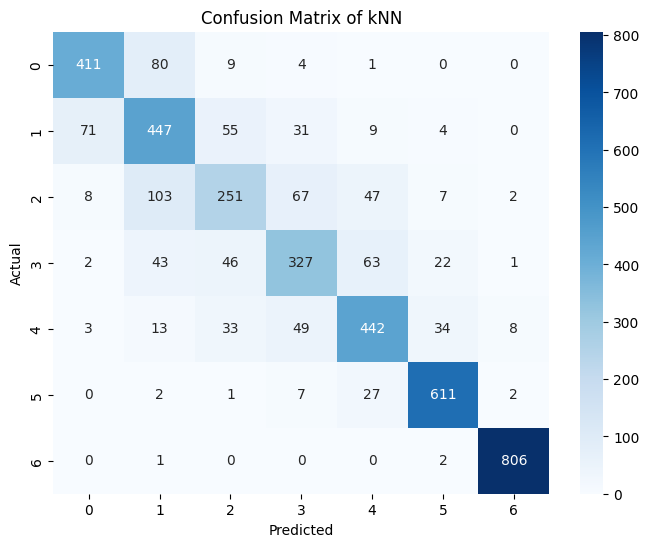

In [11]:
plot_confusion_matrix(y_test, y_predict, 'Confusion Matrix of kNN')

### Step 4 | Retrain kNN with feature selection by Random Forest with tuning hyperparameters

In [12]:
selected_features = ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [13]:
X_train_select = X_train[selected_features]
X_test_select = X_test[selected_features]

In [14]:
knn_pipeline_2 = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(metric = 'manhattan', n_neighbors = 17, weights = 'distance'))
])

In [15]:
knn_pipeline_2.fit(X_train_select, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=17,
                                      weights='distance'))])

In [16]:
print(classification_report(y_train, knn_pipeline_2.predict(X_train_select), digits=4))

              precision    recall  f1-score   support

           0     0.9936    0.9995    0.9965      2018
           1     0.9963    0.9947    0.9955      2465
           2     0.9938    0.9954    0.9946      1942
           3     0.9955    0.9945    0.9950      2018
           4     1.0000    0.9961    0.9981      2328
           5     1.0000    1.0000    1.0000      2598
           6     1.0000    1.0000    1.0000      3237

    accuracy                         0.9974     16606
   macro avg     0.9970    0.9972    0.9971     16606
weighted avg     0.9974    0.9974    0.9974     16606



In [17]:
y_predict2 = knn_pipeline_2.predict(X_test_select)
print(classification_report(y_test, y_predict2, digits=4))

              precision    recall  f1-score   support

           0     0.8586    0.8059    0.8315       505
           1     0.6403    0.7990    0.7109       617
           2     0.5971    0.4247    0.4964       485
           3     0.6781    0.6270    0.6515       504
           4     0.7765    0.8179    0.7967       582
           5     0.9268    0.9538    0.9401       650
           6     0.9902    0.9975    0.9938       809

    accuracy                         0.8008      4152
   macro avg     0.7811    0.7751    0.7744      4152
weighted avg     0.7985    0.8008    0.7963      4152



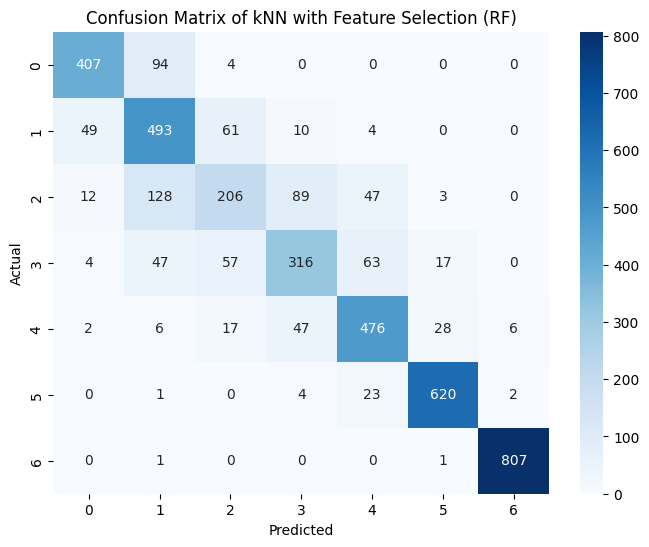

In [18]:
plot_confusion_matrix(y_test, y_predict2, 'Confusion Matrix of kNN with Feature Selection (RF)')

### Step 5 | Retrain kNN with feature selection by Random Forest with tuning hyperparameters

In [19]:
selected_features_1 = ['Gender', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF',
       'TUE', 'CALC']

In [20]:
X_train_select_1 = X_train[selected_features_1]
X_test_select_1 = X_test[selected_features_1]

In [21]:
knn_pipeline_3 = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(metric = 'manhattan', n_neighbors = 17, weights = 'distance'))
])

In [22]:
knn_pipeline_3.fit(X_train_select_1, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=17,
                                      weights='distance'))])

In [23]:
print(classification_report(y_train, knn_pipeline_3.predict(X_train_select_1), digits=4))

              precision    recall  f1-score   support

           0     0.9946    0.9995    0.9970      2018
           1     0.9955    0.9959    0.9957      2465
           2     0.9923    0.9954    0.9938      1942
           3     0.9990    0.9936    0.9963      2018
           4     1.0000    0.9979    0.9989      2328
           5     1.0000    1.0000    1.0000      2598
           6     1.0000    0.9997    0.9998      3237

    accuracy                         0.9977     16606
   macro avg     0.9973    0.9974    0.9974     16606
weighted avg     0.9977    0.9977    0.9977     16606



In [24]:
y_predict3 = knn_pipeline_3.predict(X_test_select_1)
print(classification_report(y_test, y_predict3, digits=4))

              precision    recall  f1-score   support

           0     0.8704    0.7980    0.8326       505
           1     0.6573    0.7990    0.7213       617
           2     0.6115    0.5485    0.5783       485
           3     0.6966    0.6012    0.6454       504
           4     0.7776    0.7629    0.7702       582
           5     0.9088    0.9508    0.9293       650
           6     0.9878    0.9988    0.9932       809

    accuracy                         0.8032      4152
   macro avg     0.7871    0.7799    0.7815      4152
weighted avg     0.8033    0.8032    0.8013      4152



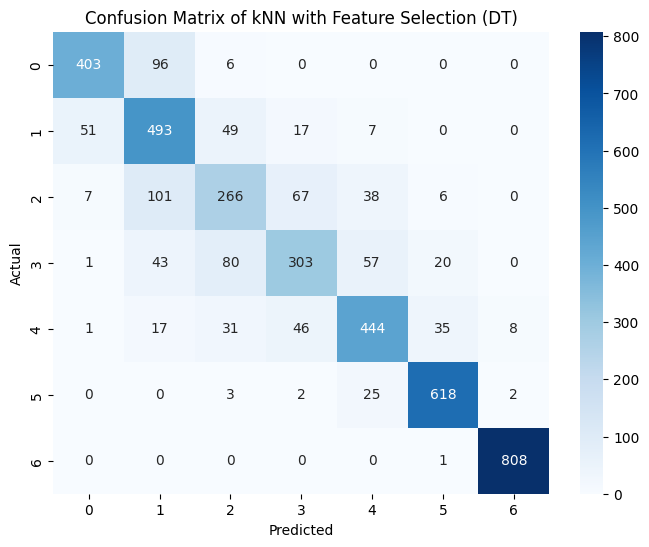

In [25]:
plot_confusion_matrix(y_test, y_predict3, 'Confusion Matrix of kNN with Feature Selection (DT)')